In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

%matplotlib inline

##  Test Function
$$y = \frac{1}{1+e^{3-x}} + 0.2$$

In [2]:
def my_function(x, args = []):
    return 1 / (1 + np.exp(3-x)) - 0.2

def my_function_derivative(x, args = []):
    return np.exp(3-x) / np.power((1 + np.exp(-(x-3))), 2)

##  Overview of Technique

3.5 0.4224593312018546
0.75 -0.10465053510089052
2.125 0.09421497216298874
1.4375 -0.026711794070673422


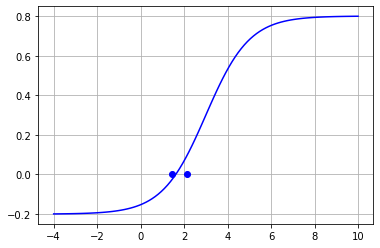

In [3]:
x = np.linspace(-4, 10, 100)
plt.plot(x, my_function(x), 'b')
plt.grid(True)

#  Initial points bracketing root
x1 = -2; x2 = 9

#  Look at function value half way between our points. If function is positive, this is our new x2 point
u = (x1 + x2) / 2; print(u, my_function(u))
x2 = u

#  Repeat process.  Here the function half way between our points innegative so this is our new x1 point
u = (x1 + x2) / 2; print(u, my_function(u))
x1 = u

#  Repeat
u = (x1 + x2) / 2; print(u, my_function(u))
x2 = u

#  Repeat  until some desired tolerance is reached
u = (x1 + x2) / 2; print(u, my_function(u))
x1 = u

plt.plot(x1, 0, 'bo')
plt.plot(x2, 0, 'bo')

##  Implement algorithm via a function

In [4]:
def bisection(f, x1, x2, max_iter = 1000, tol = 1e-3, args = []):
    
    epsilon = 1
    count = 0
    
    R = (x1 + x2) / 2
    
    while epsilon >= tol:
        
        count += 1
        
        if count >= max_iter:
            print('Exiting on runaway loop.')
            return (R, count)
        
        old_R = R
        
        f_root = f(R, args)
        if np.sign(f_root) == np.sign( f(x2, args) ):
            x2 = R
        if np.sign(f_root) == np.sign( f(x1, args) ):
            x1 = R

        R = (x1 + x2) / 2
        
        epsilon = np.abs((R - old_R) / old_R)
        
    return R, count

def newtons_method(f, fprime, R = 0, max_iter = 1000, tol=1e-3, args = [], debug = False):
    count = 0
    epsilon = 1
    
    while epsilon >= tol:
        count += 1
        if count >= max_iter:
            print('Exiting on runaway loop.')
            return (R, count)
        
        old_R = R
        
        function_value = f(R, args = args)
        function_derivative = fprime(R, args = args)
        
               
        R = -function_value / function_derivative + R
        
        epsilon = np.abs( (R - old_R) / old_R)
        if debug == True:
            print('Iteration = ', count, 'f = ', function_value, 'fprime = ', function_derivative, 'Tol = ', epsilon)
        
    return R, count

##  Test our code with our trial function

1.6134033203125 12


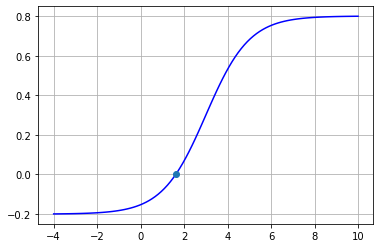

In [5]:
R, count = bisection(my_function,-2, 9)
print(R, count)

#x = np.linspace(0, 20, 100)
plt.plot(x, my_function(x), 'b')
plt.grid(True)
plt.plot(R, my_function(R), 'o')

In [6]:
R, count = newtons_method(my_function, my_function_derivative, R = 0)
print(R, count)

1.6137056388968707 5


C:\Users\moone\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in double_scalars


##  Test against our implied volatility code

In [7]:
def call_price(sigma, S, K, r, t):
    d1 = np.multiply( 1. / sigma * np.divide(1., np.sqrt(t)),
        np.log(S/K) + (r + sigma**2 / 2.) * t  )
    d2 = d1 - sigma * np.sqrt(t)
    
    C = np.multiply(S, norm.cdf(d1)) - \
        np.multiply(norm.cdf(d2) * K, np.exp(-r * t))
    return C

def put_price(sigma, S, K, r, t):
    d1 = np.multiply( 1. / sigma * np.divide(1., np.sqrt(t)),
        np.log(S/K) + (r + sigma**2 / 2.) * t  )
    d2 = d1 - sigma * np.sqrt(t)
    
    P = -np.multiply(S, norm.cdf(-d1)) + \
        np.multiply(norm.cdf(-d2) * K, np.exp(-r * t))
    return P

def objective_function(sigma, args):
    S = args[0]
    K = args[1]
    r = args[2]
    t = args[3]
    price = args[4]
    
    return call_price(sigma, S, K, r, t) - price

def calculate_vega(sigma, args):
    S = args[0]
    K = args[1]
    r = args[2]
    t = args[3]
    
    d1 = np.multiply( 1. / sigma * np.divide(1., np.sqrt(t)),
        np.log(S/K) + (r + sigma**2 / 2.) * t  )
    d2 = d1 - sigma * np.sqrt(t)
    
    return S * norm.pdf(d1) * np.sqrt(t)

In [8]:
S = 100.0
K = 105.0
t = 30.0 / 365.0
r = 0.01
C0 =2.30

args = [S, K, r, t, C0]

R, count = bisection(objective_function, 0.001, 0.5, args = args)
print(R, count)

0.36867138671875 10
